# Relazioni Non-Lineari: Funzioni Base e Regressione Logistica

## 1. Introduzione alle Relazioni Non-Lineari

Nella regressione lineare standard, modelliamo la relazione tra input e output come:

$$y(x, w) = w_1 x + w_0$$

Questo approccio presuppone che i dati seguano una relazione lineare. Tuttavia, molti fenomeni reali presentano relazioni non-lineari dove questo modello risulta inadeguato.

Le relazioni non-lineari possono essere modellate in due modi principali:

- Utilizzando funzioni base per trasformare l'input
- Utilizzando modelli intrinsecamente non-lineari (es. reti neurali)

## 2. Formulazione Matematica

### Modello di Regressione con Funzioni Base

Un modello non-lineare può essere espresso utilizzando funzioni base come:

$$y(x, w) = \sum_{j=0}^{N} w_j \phi_j(x)$$

Dove:

- $x$ è un vettore di caratteristiche descrittive
- $w$ è un vettore di pesi
- $\phi_j(x)$ è una serie di N funzioni base che trasformano l'input in modo diverso

È importante notare che N non deve necessariamente essere uguale al numero di caratteristiche originali d, e tipicamente N > d.

### Funzione di Errore

$$E(y, w) = \frac{1}{2m} \sum\limits_{n = 0}^{m-1} (y(x_n, w) - t_n)^2$$

## 3. Funzioni Base

Le funzioni base trasformano le variabili di input in nuove rappresentazioni, permettendo di catturare relazioni non-lineari. Ecco alcune funzioni base comuni:

- $\phi_0(x) = 1$ (termine costante/bias)
- $\phi_1(x) = x$ (funzione identità)
- $\phi_2(x) = x^2$ (quadratica)
- $\phi_3(x) = x^3$ (cubica)
- $\phi_4(x) = \sin(x)$ (sinusoidale)
- $\phi_5(x) = e^x$ (esponenziale)
- $\phi_6(x) = \log(x)$ (logaritmica)
- $\phi_7(x) = x_1 \times x_2$ (interazione tra feature)

## 4. Regressione Logistica Non-Lineare

### Formulazione del Modello

La regressione logistica può essere estesa per catturare relazioni non-lineari incorporando funzioni base:

$$y(x, w) = \frac{1}{1 + e^{-(\sum_{j=0}^{M} w_j\phi_j(x))}}$$

Questo approccio mantiene la struttura della regressione logistica ma permette di modellare confini di decisione non-lineari.

### Addestramento con Gradient Descent

Il modello viene addestrato utilizzando la discesa del gradiente per trovare i pesi ottimali $w$ che minimizzano la funzione di costo (log loss):

$$J(w) = -\frac{1}{N} \sum_{i=1}^{N} [t^{(i)} \log(y(x^{(i)}, w)) + (1-t^{(i)}) \log(1-y(x^{(i)}, w))]$$

Il gradiente di questa funzione rispetto ai pesi è:

$$\nabla J(w) = \frac{1}{N} \sum_{i=1}^{N} (y(x^{(i)}, w) - t^{(i)}) \phi(x^{(i)})$$


## 5. Implementazione in Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class NonLinearLogisticRegression:
    """
    Implementazione della regressione logistica con funzioni base non-lineari
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Inizializzazione del modello
        
        Parametri:
        learning_rate: tasso di apprendimento per la discesa del gradiente
        n_iterations: numero di iterazioni per la discesa del gradiente
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.cost_history = []
    
    def _apply_basis_functions(self, X):
        """
        Applica le funzioni base alle features originali
        
        In questo esempio usiamo:
        - termine costante
        - x1, x2 (features originali)
        - x1^2, x2^2 (termini quadratici)
        - x1*x2 (termine di interazione)
        
        Parametri:
        X -- matrice delle feature di shape (m, n)
        
        Restituisce:
        X_transformed -- matrice trasformata di shape (m, n_basis)
        """
        m, n = X.shape
        X_transformed = np.ones((m, 1))  # Aggiungiamo termine costante
        
        # Aggiungiamo le feature originali
        X_transformed = np.hstack((X_transformed, X))
        
        # Aggiungiamo termini quadratici
        X_squared = X ** 2
        X_transformed = np.hstack((X_transformed, X_squared))
        
        # Aggiungiamo termini di interazione per coppie di feature
        if n >= 2:
            for i in range(n):
                for j in range(i+1, n):
                    interaction = X[:, i:i+1] * X[:, j:j+1]
                    X_transformed = np.hstack((X_transformed, interaction))
        
        # Aggiungiamo termini cubici se necessario
        # X_cubed = X ** 3
        # X_transformed = np.hstack((X_transformed, X_cubed))
        
        return X_transformed
    
    def _sigmoid(self, z):
        """
        Funzione sigmoide: 1/(1 + e^(-z))
        """
        # Limitiamo z per evitare overflow/underflow numerici
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def _compute_cost(self, X, y):
        """
        Calcola la funzione di costo (log loss)
        """
        m = X.shape[0]
        z = np.dot(X, self.weights)
        h = self._sigmoid(z)
        
        # Per evitare log(0)
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)
        
        cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost
    
    def fit(self, X, y):
        """
        Addestra il modello
        
        Parametri:
        X -- matrice delle feature di shape (m, n)
        y -- vettore delle etichette di shape (m,)
        """
        # Applichiamo le funzioni base
        X_transformed = self._apply_basis_functions(X)
        
        m, n = X_transformed.shape
        self.weights = np.zeros(n)
        
        print(f"Addestramento con {n} funzioni base...")
        
        for i in range(self.n_iterations):
            # Calcolo della previsione
            z = np.dot(X_transformed, self.weights)
            h = self._sigmoid(z)
            
            # Calcolo del gradiente
            gradient = 1/m * np.dot(X_transformed.T, (h - y))
            
            # Aggiornamento dei pesi
            self.weights = self.weights - self.learning_rate * gradient
            
            # Calcolo e salvataggio del costo
            if (i % 100 == 0) or (i == self.n_iterations - 1):
                cost = self._compute_cost(X_transformed, y)
                self.cost_history.append(cost)
                print(f"Iterazione {i}: Costo = {cost:.6f}")
        
        print("Addestramento completato!")
    
    def predict_proba(self, X):
        """
        Calcola le probabilità di appartenenza alla classe positiva
        
        Parametri:
        X -- matrice delle feature di shape (m, n)
        
        Restituisce:
        probs -- vettore di probabilità di shape (m,)
        """
        X_transformed = self._apply_basis_functions(X)
        z = np.dot(X_transformed, self.weights)
        return self._sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        """
        Predice le etichette di classe
        
        Parametri:
        X -- matrice delle feature di shape (m, n)
        threshold -- soglia di decisione (default: 0.5)
        
        Restituisce:
        y_pred -- vettore delle classi predette di shape (m,)
        """
        probs = self.predict_proba(X)
        return (probs >= threshold).astype(int)
    
    def plot_cost_history(self):
        """
        Visualizza l'andamento della funzione di costo durante l'addestramento
        """
        plt.figure(figsize=(10, 6))
        plt.plot(range(0, self.n_iterations, 100), self.cost_history)
        plt.xlabel('Iterazioni')
        plt.ylabel('Costo (Log Loss)')
        plt.title('Andamento della funzione di costo')
        plt.grid(True)
        plt.show()

## 6. Visualizzazione dei Confini di Decisione

Per comprendere meglio il comportamento di un modello non-lineare, è utile visualizzare i confini di decisione:

In [1]:
def plot_decision_boundary(model, X, y, title=None, resolution=0.01):
    """
    Visualizza il confine di decisione di un modello
    
    Parametri:
    model -- il modello addestrato
    X -- matrice delle feature
    y -- vettore delle etichette
    title -- titolo del grafico
    resolution -- risoluzione della griglia
    """
    # Definiamo i limiti del grafico
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Creiamo una griglia di punti
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Prediciamo la classe per ogni punto della griglia
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Visualizziamo il confine di decisione
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Aggiungiamo i punti del dataset
    colors = ['blue', 'red']
    for i in range(2):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=colors[i], 
                    edgecolor='k', s=50, label=f'Classe {i}')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title or 'Confine di Decisione')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [2]:
def compare_models(X, y, title=None):
    """
    Confronta un modello lineare e non-lineare sullo stesso dataset
    
    Parametri:
    X -- matrice delle feature
    y -- vettore delle etichette
    title -- titolo del grafico
    """
    # Split dei dati
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    
    # Modello lineare (con solo le feature originali)
    from sklearn.linear_model import LogisticRegression
    linear_model = LogisticRegression(random_state=42)
    linear_model.fit(X_train, y_train)
    
    y_pred_linear = linear_model.predict(X_test)
    acc_linear = accuracy_score(y_test, y_pred_linear)
    
    # Modello non-lineare (con funzioni base)
    nonlinear_model = NonLinearLogisticRegression(
        learning_rate=0.01, n_iterations=1000)
    nonlinear_model.fit(X_train, y_train)
    
    y_pred_nonlinear = nonlinear_model.predict(X_test)
    acc_nonlinear = accuracy_score(y_test, y_pred_nonlinear)
    
    print(f"Accuratezza modello lineare: {acc_linear:.4f}")
    print(f"Accuratezza modello non-lineare: {acc_nonlinear:.4f}")
    
    # Visualizziamo i confini di decisione
    plt.figure(figsize=(15, 6))
    
    # Modello lineare
    plt.subplot(1, 2, 1)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = linear_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    for i in range(2):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=['blue', 'red'][i], 
                    edgecolor='k', s=50, label=f'Classe {i}')
    
    plt.title(f'Modello Lineare (Acc: {acc_linear:.4f})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    
    # Modello non-lineare
    plt.subplot(1, 2, 2)
    Z = nonlinear_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    for i in range(2):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=['blue', 'red'][i], 
                    edgecolor='k', s=50, label=f'Classe {i}')
    
    plt.title(f'Modello Non-Lineare (Acc: {acc_nonlinear:.4f})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# 7. Esempio di Applicazione: Dataset IoT e Propagazione del Segnale

Nel contesto delle telecomunicazioni , spesso le relazioni sono intrinsecamente non lineari. In questo notebook esploreremo un caso studio sulla qualità del segnale ricevuto dai dispositivi, dove diversi fattori influenzano in modo non lineare la ricezione del segnale.

## 7.1 Carichiamo il dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.optimize import curve_fit


In [4]:
# Rileggi il dataset dal file CSV
df_loaded = pd.read_csv('signal_data.csv')

In [5]:
df_loaded.head()  # Mostra le prime righe del dataframe

,distance,obstacles,temperature,humidity,signal_quality,signal_class
0,1.935247,6.981617,7.405317,56.335725,0.170186,0
1,4.758500,5.360964,21.676038,53.542731,0.000000,0
2,3.686770,3.095276,34.917833,21.794945,0.000000,0
3,3.033427,8.137950,29.288995,43.887348,0.000000,0
4,0.864491,6.847312,32.262446,46.613693,7.663143,1


Con signal class intendiamo un segnale buono con la classe 1, un segnale debole con classe 0

In [6]:
df_loaded.info()  # Mostra informazioni sul dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distance        500 non-null    float64
 1   obstacles       500 non-null    float64
 2   temperature     500 non-null    float64
 3   humidity        500 non-null    float64
 4   signal_quality  500 non-null    float64
 5   signal_class    500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [12]:
# Estrai le features e le etichette
distance = df_loaded['distance'].values
obstacles = df_loaded['obstacles'].values
temperature = df_loaded['temperature'].values
humidity = df_loaded['humidity'].values
signal_quality = df_loaded['signal_quality'].values
signal_class = df_loaded['signal_class'].values
X = np.column_stack([distance, obstacles])
X_full = np.column_stack([distance, obstacles, temperature, humidity])
n_samples = X.shape[0]

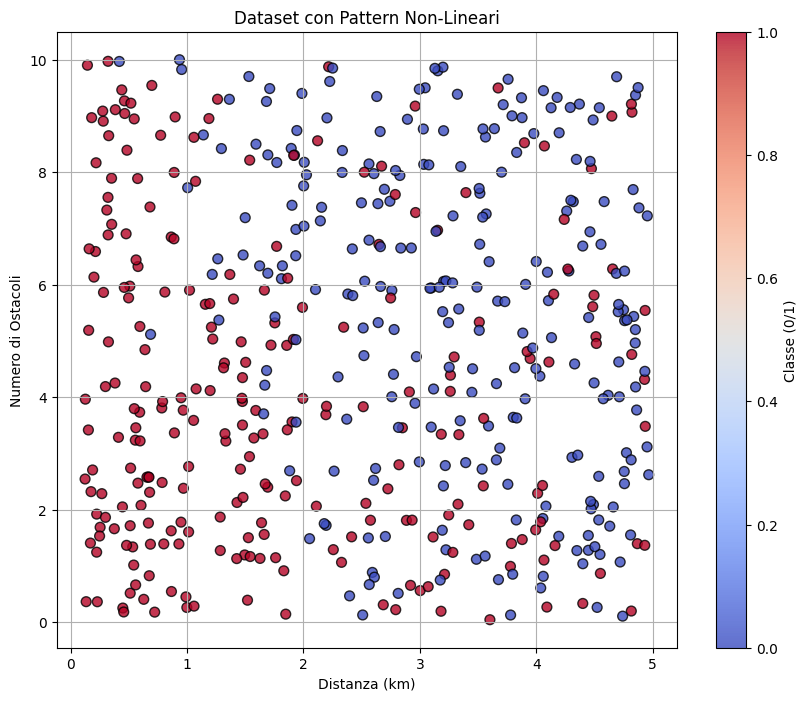

In [13]:
# Visualizziamo la nuova distribuzione
plt.figure(figsize=(10, 8))
plt.scatter(distance, obstacles, c=signal_class, cmap='coolwarm', 
           alpha=0.8, s=50, edgecolor='k')
plt.colorbar(label='Classe (0/1)')
plt.xlabel('Distanza (km)')
plt.ylabel('Numero di Ostacoli')
plt.title('Dataset con Pattern Non-Lineari')
plt.grid(True)
plt.show()

## 7.2 Modellazione della Qualità del Segnale con Relazioni Non Lineari

Assumiamo che la qualità del segnale dipenda in modo non lineare dai fattori:

1. **Distanza**: La potenza del segnale diminuisce con il quadrato della distanza (legge dell'inverso del quadrato)
2. **Ostacoli**: Gli ostacoli attenuano il segnale in modo esponenziale
3. **Temperatura**: La temperatura ha un effetto quadratico (ottimale intorno ai 20°C)
4. **Umidità**: L'umidità ha un effetto logaritmico


## 7.3 Visualizzazione delle Relazioni Non Lineari

### 7.3.1 Scatter Plot della Classificazione

Prima vediamo come si distribuiscono i dati di distanza e ostacoli rispetto alla qualità del segnale:

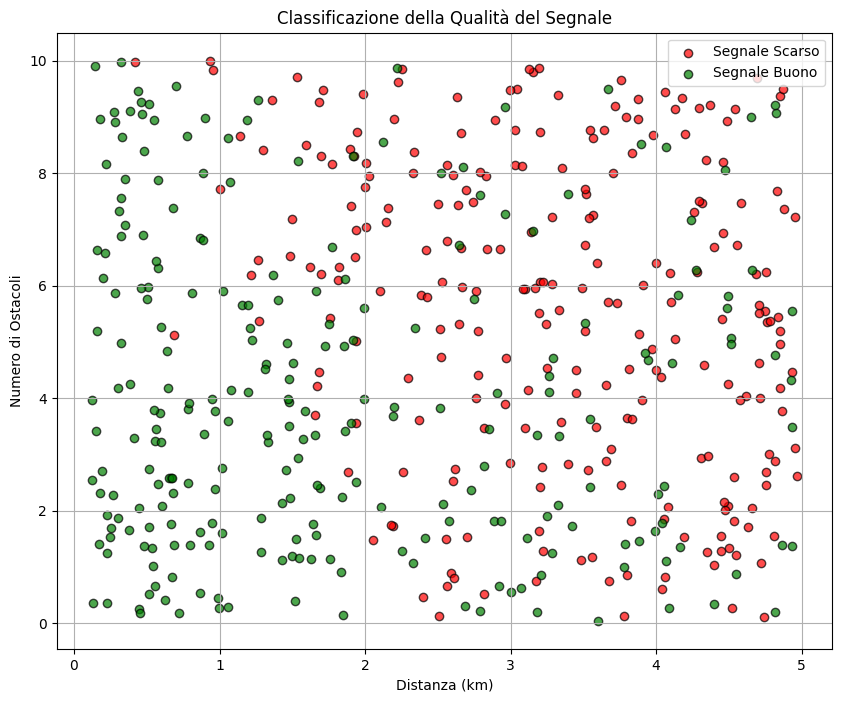

In [14]:
plt.figure(figsize=(10, 8))
colors = ['red', 'green']
labels = ['Segnale Scarso', 'Segnale Buono']

for i in range(2):
    idx = np.where(signal_class == i)
    plt.scatter(distance[idx], obstacles[idx], c=colors[i], alpha=0.7, 
                label=labels[i], edgecolor='k')

plt.xlabel('Distanza (km)')
plt.ylabel('Numero di Ostacoli')
plt.title('Classificazione della Qualità del Segnale')
plt.legend()
plt.grid(True)
plt.show()

### 7.3.2 Heatmap della Qualità del Segnale

In [15]:
signal_quality

array([1.70186257e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.66314278e+00, 3.64752341e+01, 1.16375333e+01, 1.58256078e+00,
       5.26951496e+00, 5.95140777e-01, 2.03596439e+01, 3.13359353e-01,
       1.74466561e+00, 1.62125936e+00, 2.43088310e+01, 2.95615074e+01,
       1.56951563e+01, 6.40375141e+00, 6.25298178e+00, 1.67831979e+01,
       2.82035579e+00, 2.07295155e+01, 0.00000000e+00, 6.90903580e-01,
       4.65371382e+00, 7.99288415e+00, 1.25423971e+01, 2.67587722e+00,
       6.31727404e+00, 1.34090702e+01, 0.00000000e+00, 0.00000000e+00,
       5.01899907e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.96056619e+00, 3.93385494e+01, 3.50341729e+00, 1.09412311e+01,
       1.06732826e+01, 0.00000000e+00, 4.88800795e+01, 5.99126042e-01,
       8.95440009e+00, 0.00000000e+00, 6.68005800e+00, 5.71808671e+00,
       4.68396873e+00, 6.68693757e-01, 0.00000000e+00, 6.49710354e+00,
       0.00000000e+00, 9.18749208e+00, 0.00000000e+00, 4.82274926e+00,
      

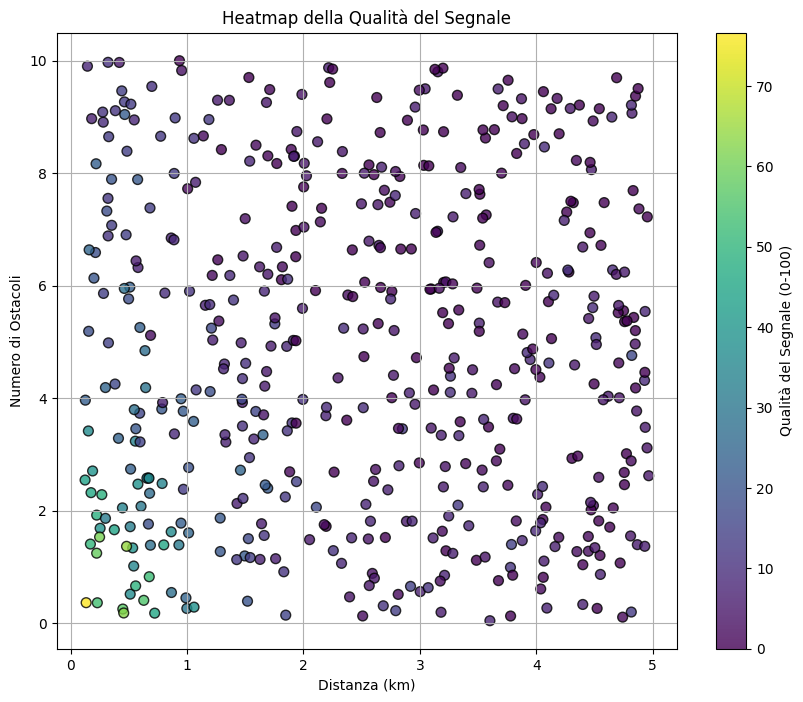

In [16]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(distance, obstacles, c=signal_quality, cmap='viridis', 
            alpha=0.8, s=50, edgecolor='k')
plt.colorbar(scatter, label='Qualità del Segnale (0-100)')
plt.xlabel('Distanza (km)')
plt.ylabel('Numero di Ostacoli')
plt.title('Heatmap della Qualità del Segnale')
plt.grid(True)
plt.show()

### 7.3.3 Relazione tra Distanza e Qualità del Segnale

Studiamo in dettaglio la relazione tra distanza e qualità del segnale:

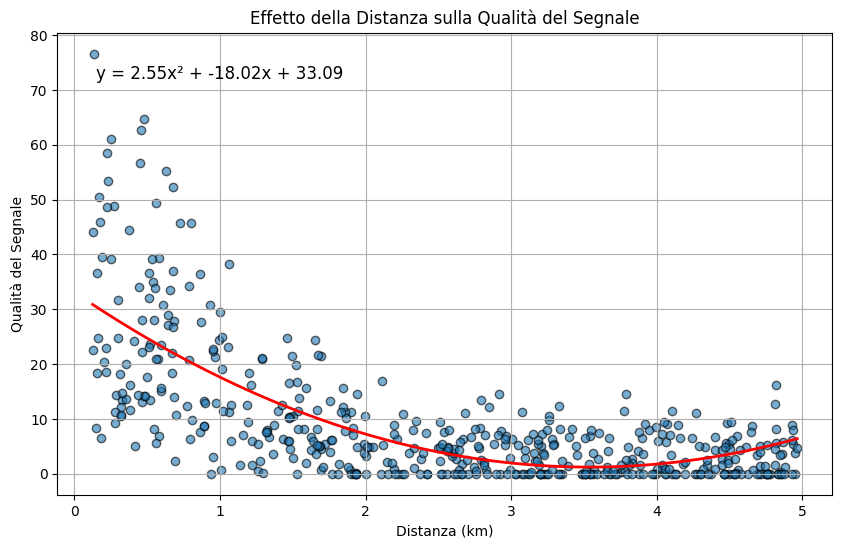

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(distance, signal_quality, alpha=0.6, edgecolor='k')

# Implementiamo manualmente la regressione polinomiale di grado 2
def fit_polynomial_regression(x, y, degree=2):
    """Implementazione manuale della regressione polinomiale"""
    # Creiamo la matrice delle feature polinomiali
    X_poly = np.ones((len(x), 1))  # Termine costante
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, (x.reshape(-1, 1) ** d)))
    
    # Calcolo dei pesi usando l'equazione normale
    # w = (X^T X)^(-1) X^T y
    X_T_X = np.dot(X_poly.T, X_poly)
    X_T_y = np.dot(X_poly.T, y)
    weights = np.linalg.solve(X_T_X, X_T_y)
    
    return weights

def predict_polynomial(x, weights):
    """Predice usando i pesi di una regressione polinomiale"""
    y_pred = weights[0]  # Termine costante
    for i in range(1, len(weights)):
        y_pred += weights[i] * (x ** i)
    return y_pred

# Addestriamo la regressione polinomiale
poly_weights = fit_polynomial_regression(distance, signal_quality, degree=2)

# Generiamo punti per la curva
x_range = np.linspace(min(distance), max(distance), 100)
y_pred = predict_polynomial(x_range, poly_weights)

plt.plot(x_range, y_pred, 'r-', linewidth=2)

# Aggiungiamo l'equazione del modello
a, b, c = poly_weights[2], poly_weights[1], poly_weights[0]
equation = f'y = {a:.2f}x² + {b:.2f}x + {c:.2f}'
plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

plt.xlabel('Distanza (km)')
plt.ylabel('Qualità del Segnale')
plt.title('Effetto della Distanza sulla Qualità del Segnale')
plt.grid(True)
plt.show()

### 7.3.4 Relazione tra Ostacoli e Qualità del Segnale
La teoria prevede un decadimento esponenziale con l'aumentare degli ostacoli:

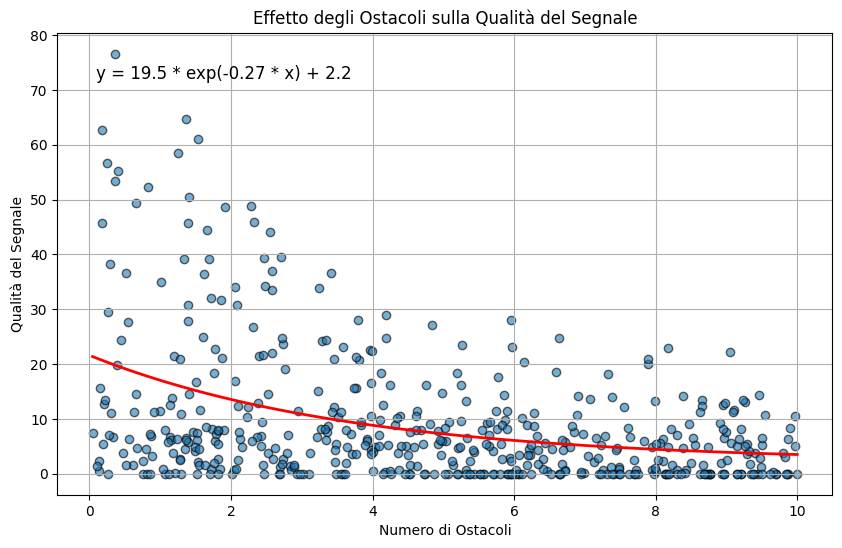

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(obstacles, signal_quality, alpha=0.6, edgecolor='k')

# Definiamo una funzione esponenziale
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Adattiamo la curva esponenziale
popt, pcov = curve_fit(exp_func, obstacles, signal_quality, 
                      p0=[100, 0.2, 10], maxfev=10000)

x_range = np.linspace(obstacles.min(), obstacles.max(), 100)
y_pred = exp_func(x_range, *popt)

plt.plot(x_range, y_pred, 'r-', linewidth=2)
plt.annotate(f'y = {popt[0]:.1f} * exp(-{popt[1]:.2f} * x) + {popt[2]:.1f}', 
            xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

plt.xlabel('Numero di Ostacoli')
plt.ylabel('Qualità del Segnale')
plt.title('Effetto degli Ostacoli sulla Qualità del Segnale')
plt.grid(True)
plt.show()

## 7.4 Modellazione della Temperatura:
La temperatura è un fattore interessante perché ha un effetto non monotono: le prestazioni sono ottimali intorno ai 20°C e peggiorano sia a temperature più alte che più basse.

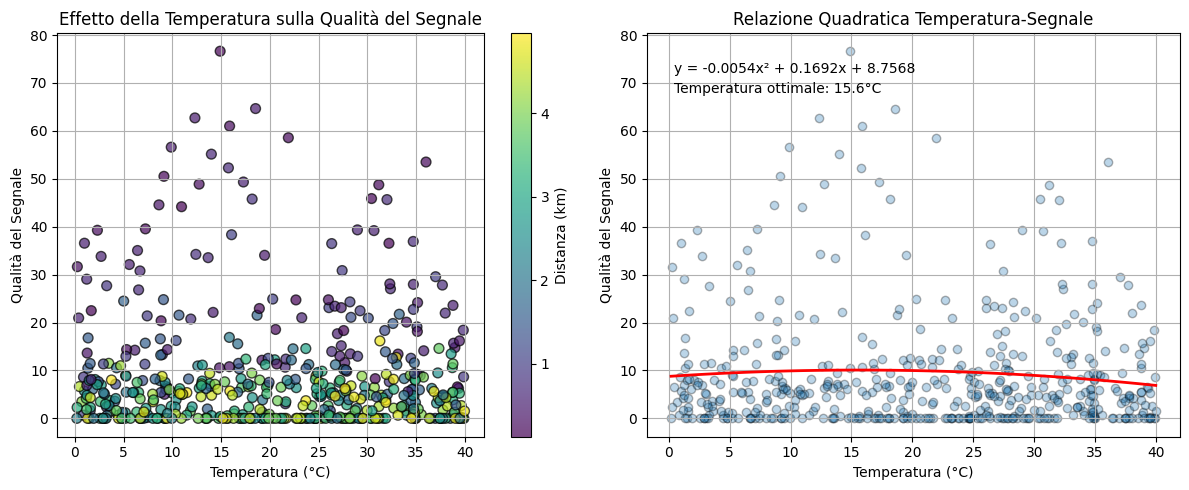

In [ ]:
plt.figure(figsize=(12, 5))

# Scatter plot colorato per distanza
plt.subplot(1, 2, 1)
scatter = plt.scatter(temperature, signal_quality, c=distance, cmap='viridis', 
                    alpha=0.7, s=50, edgecolor='k')
plt.colorbar(scatter, label='Distanza (km)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Qualità del Segnale')
plt.title('Effetto della Temperatura sulla Qualità del Segnale')
plt.grid(True)

# Fit quadratico manuale
plt.subplot(1, 2, 2)
poly_weights = fit_polynomial_regression(temperature, signal_quality, degree=2)

x_range = np.linspace(min(temperature), max(temperature), 100)
y_pred = predict_polynomial(x_range, poly_weights)

plt.scatter(temperature, signal_quality, alpha=0.3, edgecolor='k')
plt.plot(x_range, y_pred, 'r-', linewidth=2)

# Aggiungiamo l'equazione
a, b, c = poly_weights[2], poly_weights[1], poly_weights[0]
equation = f'y = {a:.4f}x² + {b:.4f}x + {c:.4f}'
plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction')

# Calcoliamo la temperatura ottimale
optimal_temp = -b / (2*a) if a != 0 else "N/A"
plt.annotate(f'Temperatura ottimale: {optimal_temp:.1f}°C', 
            xy=(0.05, 0.85), xycoords='axes fraction')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Qualità del Segnale')
plt.title('Relazione Quadratica Temperatura-Segnale')
plt.grid(True)

plt.tight_layout()
plt.show()


## 7.5 Confronto tra Modello Lineare e Non-Lineare
Ora confrontiamo un modello lineare con uno non-lineare sulla classificazione della qualità del segnale:

In [ ]:
# Funzione per dividere il dataset in train e test
def train_test_split(X, y, test_size=0.3, random_state=None):
    """Divide il dataset in set di training e test"""
    if random_state is not None:
        np.random.seed(random_state)
    
    # Mescoliamo gli indici
    n_samples = len(y)
    indices = np.random.permutation(n_samples)
    test_size = int(test_size * n_samples)
    
    # Dividiamo gli indici per train e test
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Implementazione di una regressione logistica personalizzata
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, random_seed=None):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
        if random_seed is not None:
            np.random.seed(random_seed)
    
    def _sigmoid(self, z):
        """Funzione sigmoide: 1/(1 + e^(-z))"""
        z = np.clip(z, -500, 500)  # Previene overflow
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """Addestra il modello usando la discesa del gradiente"""
        n_samples, n_features = X.shape
        
        # Inizializziamo i pesi
        self.weights = np.random.randn(n_features)
        self.bias = 0
        
        # Gradient descent
        for i in range(self.n_iterations):
            # Calcolo dell'output del modello
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            # Calcolo delle derivate
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            # Aggiornamento dei pesi
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
        return self
    
    def predict_proba(self, X):
        """Calcola la probabilità di appartenenza alla classe positiva"""
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        """Predice le etichette di classe"""
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

# Implementazione di una regressione logistica non-lineare
class NonLinearLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.cost_history = []
    
    def _apply_basis_functions(self, X):
        """Applica funzioni base non-lineari alle features"""
        m, n = X.shape
        X_transformed = np.ones((m, 1))  # Termine costante
        
        # Feature originali
        X_transformed = np.hstack((X_transformed, X))
        
        # Termini quadratici
        X_squared = X * 2
        X_transformed = np.hstack((X_transformed, X_squared))
        
        # Interazioni
        if n >= 2:
            for i in range(n):
                for j in range(i+1, n):
                    interaction = X[:, i:i+1] * X[:, j:j+1]
                    X_transformed = np.hstack((X_transformed, interaction))
        
        return X_transformed
    
    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)  # Previene overflow
        return 1 / (1 + np.exp(-z))
    
    def _compute_cost(self, X, y):
        m = X.shape[0]
        z = np.dot(X, self.weights)
        h = self._sigmoid(z)
        
        # Previene log(0)
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)
        
        cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost
    
    def fit(self, X, y):
        # Applichiamo le funzioni base
        X_transformed = self._apply_basis_functions(X)
        
        m, n = X_transformed.shape
        self.weights = np.zeros(n)
        
        for i in range(self.n_iterations):
            # Calcolo della previsione
            z = np.dot(X_transformed, self.weights)
            h = self._sigmoid(z)
            
            # Calcolo del gradiente
            gradient = 1/m * np.dot(X_transformed.T, (h - y))
            
            # Aggiornamento dei pesi
            self.weights = self.weights - self.learning_rate * gradient
            
            # Salvataggio del costo
            if (i % 100 == 0) or (i == self.n_iterations - 1):
                cost = self._compute_cost(X_transformed, y)
                self.cost_history.append(cost)
        
        return self
    
    def predict_proba(self, X):
        X_transformed = self._apply_basis_functions(X)
        z = np.dot(X_transformed, self.weights)
        return self._sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        probs = self.predict_proba(X)
        return (probs >= threshold).astype(int)

def accuracy_score(y_true, y_pred):
    """Calcola l'accuratezza della classificazione"""
    return np.mean(y_true == y_pred)

Ora confrontiamo i due modelli:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, signal_class, test_size=0.3, random_state=42)

# Modello lineare
linear_model = LogisticRegression(learning_rate=0.01, n_iterations=100000)
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

# Modello non-lineare
nonlinear_model = NonLinearLogisticRegression(learning_rate=0.01, n_iterations=100000)
nonlinear_model.fit(X_train, y_train)
y_pred_nonlinear = nonlinear_model.predict(X_test)
acc_nonlinear = accuracy_score(y_test, y_pred_nonlinear)

print(f"Accuratezza modello lineare: {acc_linear:.4f}")
print(f"Accuratezza modello non-lineare: {acc_nonlinear:.4f}")

Accuratezza modello lineare: 0.7467
Accuratezza modello non-lineare: 0.7600


Visualizziamo i confini di decisione:

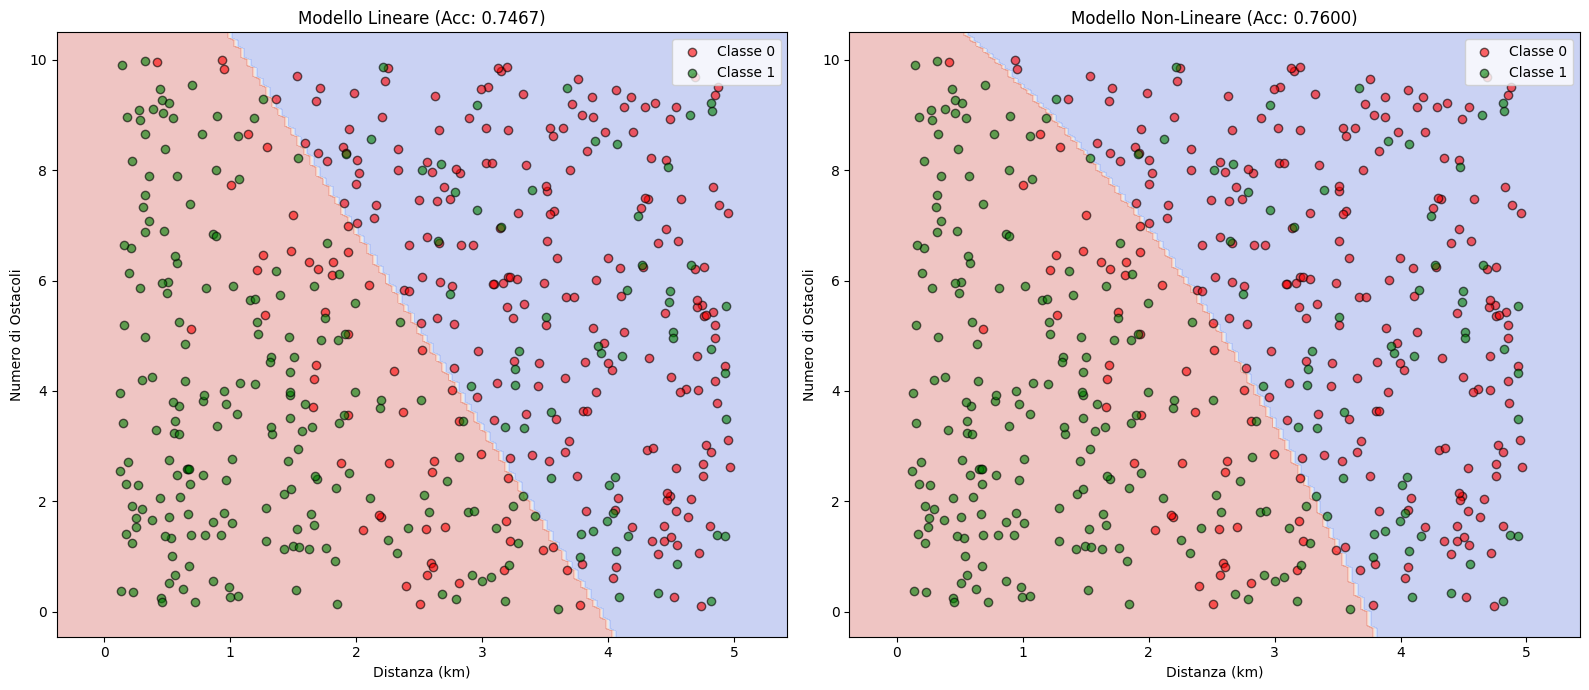

In [ ]:
# Funzione per visualizzare i confini di decisione
def plot_decision_boundary(model_linear, model_nonlinear, X, y):
    # Definiamo i limiti del grafico
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Creiamo una griglia di punti
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    
    # Figura con due subplot
    plt.figure(figsize=(16, 7))
    
    # Modello lineare
    plt.subplot(1, 2, 1)
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model_linear.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    for i, color in zip([0, 1], ['red', 'green']):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=f"Classe {i}",
                   edgecolor='k', alpha=0.6)
    
    plt.title(f'Modello Lineare (Acc: {acc_linear:.4f})')
    plt.xlabel('Distanza (km)')
    plt.ylabel('Numero di Ostacoli')
    plt.legend()
    
    # Modello non-lineare
    plt.subplot(1, 2, 2)
    Z = model_nonlinear.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    for i, color in zip([0, 1], ['red', 'green']):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=f"Classe {i}",
                   edgecolor='k', alpha=0.6)
    
    plt.title(f'Modello Non-Lineare (Acc: {acc_nonlinear:.4f})')
    plt.xlabel('Distanza (km)')
    plt.ylabel('Numero di Ostacoli')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


# Visualizziamo i confini
plot_decision_boundary(linear_model, nonlinear_model, X, signal_class)

## 7.6 Confronto tra Diverse Funzioni Base

Per capire meglio l'impatto delle diverse funzioni base, creiamo una classe che ci permette di testare varie trasformazioni:

In [ ]:
class CustomBasisLogisticRegression:
    def __init__(self, basis_type='basic', learning_rate=0.01, n_iterations=1000):
        """
        Inizializza il modello con un tipo specifico di funzioni base
        
        basis_type: può essere 'basic', 'quadratic', 'exponential', 
                   'trigonometric', o 'comprehensive'
        """
        self.basis_type = basis_type
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
    
    def _transform(self, X):
        """Applica le funzioni base specificate"""
        if self.basis_type == 'basic':
            # Solo le feature originali
            X_transformed = np.hstack([np.ones((X.shape[0], 1)), X])
            return X_transformed
            
        elif self.basis_type == 'quadratic':
            # Termini quadratici
            X_quad = X**2
            X_transformed = np.hstack([np.ones((X.shape[0], 1)), X, X_quad])
            return X_transformed
            
        elif self.basis_type == 'exponential':
            # Funzioni esponenziali
            X_exp = np.exp(-X)  # exp(-x)
            X_transformed = np.hstack([np.ones((X.shape[0], 1)), X, X_exp])
            return X_transformed
            
        elif self.basis_type == 'trigonometric':
            # Funzioni trigonometriche
            X_sin = np.sin(X)
            X_cos = np.cos(X)
            X_transformed = np.hstack([np.ones((X.shape[0], 1)), X, X_sin, X_cos])
            return X_transformed
            
        elif self.basis_type == 'comprehensive':
            # Tutte le trasformazioni precedenti
            X_quad = X**2
            X_exp = np.exp(-X)
            X_log = np.log(1 + np.abs(X))
            X_sin = np.sin(X)
            X_cos = np.cos(X)
            # Termini di interazione
            n_features = X.shape[1]
            X_interaction = np.zeros((X.shape[0], 0))
            
            if n_features >= 2:
                for i in range(n_features):
                    for j in range(i+1, n_features):
                        X_ij = X[:, i:i+1] * X[:, j:j+1]
                        X_interaction = np.hstack([X_interaction, X_ij])
            
            X_transformed = np.hstack([
                np.ones((X.shape[0], 1)), X, X_quad, X_exp, 
                X_log, X_sin, X_cos, X_interaction
            ])
            return X_transformed
    
    def _sigmoid(self, z):
        """Funzione sigmoide: 1/(1 + e^(-z))"""
        z = np.clip(z, -500, 500)  # Previene overflow
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """Addestra il modello"""
        X_transformed = self._transform(X)
        m, n = X_transformed.shape
        
        # Inizializziamo i pesi
        self.weights = np.zeros(n)
        
        # Gradient descent
        for _ in range(self.n_iterations):
            # Calcolo della previsione
            z = np.dot(X_transformed, self.weights)
            y_pred = self._sigmoid(z)
            
            # Calcolo del gradiente
            gradient = 1/m * np.dot(X_transformed.T, (y_pred - y))
            
            # Aggiornamento dei pesi
            self.weights -= self.learning_rate * gradient
        
        return self
    
    def predict_proba(self, X):
        """Calcola la probabilità di appartenenza alla classe positiva"""
        X_transformed = self._transform(X)
        z = np.dot(X_transformed, self.weights)
        return self._sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        """Predice le etichette di classe"""
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
    def score(self, X, y):
        """Calcola l'accuratezza"""
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

Addestramento modello con funzioni base: basic
  Accuratezza: 0.7733
Addestramento modello con funzioni base: quadratic
  Accuratezza: 0.6067
Addestramento modello con funzioni base: exponential
  Accuratezza: 0.7933
Addestramento modello con funzioni base: trigonometric
  Accuratezza: 0.7533
Addestramento modello con funzioni base: comprehensive
  Accuratezza: 0.7467


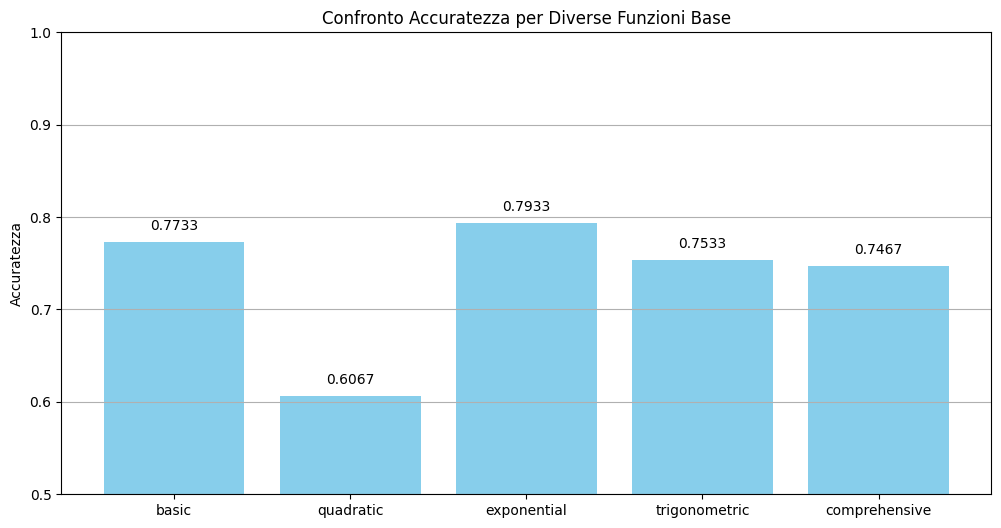

In [ ]:
# Tipi di funzioni base da testare
basis_types = ['basic', 'quadratic', 'exponential', 'trigonometric', 'comprehensive']

# Split dei dati
X_train, X_test, y_train, y_test = train_test_split(
    X, signal_class, test_size=0.3, random_state=42)

# Dizionario per memorizzare i modelli e le accuratezze
models = {}
accuracies = {}

for basis_type in basis_types:
    print(f"Addestramento modello con funzioni base: {basis_type}")
    model = CustomBasisLogisticRegression(basis_type=basis_type, learning_rate=0.01, n_iterations=1000)
    model.fit(X_train, y_train)
    
    # Calcoliamo l'accuratezza
    accuracy = model.score(X_test, y_test)
    
    models[basis_type] = model
    accuracies[basis_type] = accuracy
    
    print(f"  Accuratezza: {accuracy:.4f}")

# Visualizziamo i risultati
plt.figure(figsize=(12, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')

# Aggiungiamo le etichette
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.4f}', ha='center', va='bottom')

plt.ylim(0.5, 1.0)
plt.title('Confronto Accuratezza per Diverse Funzioni Base')
plt.ylabel('Accuratezza')
plt.grid(axis='y')
plt.show()

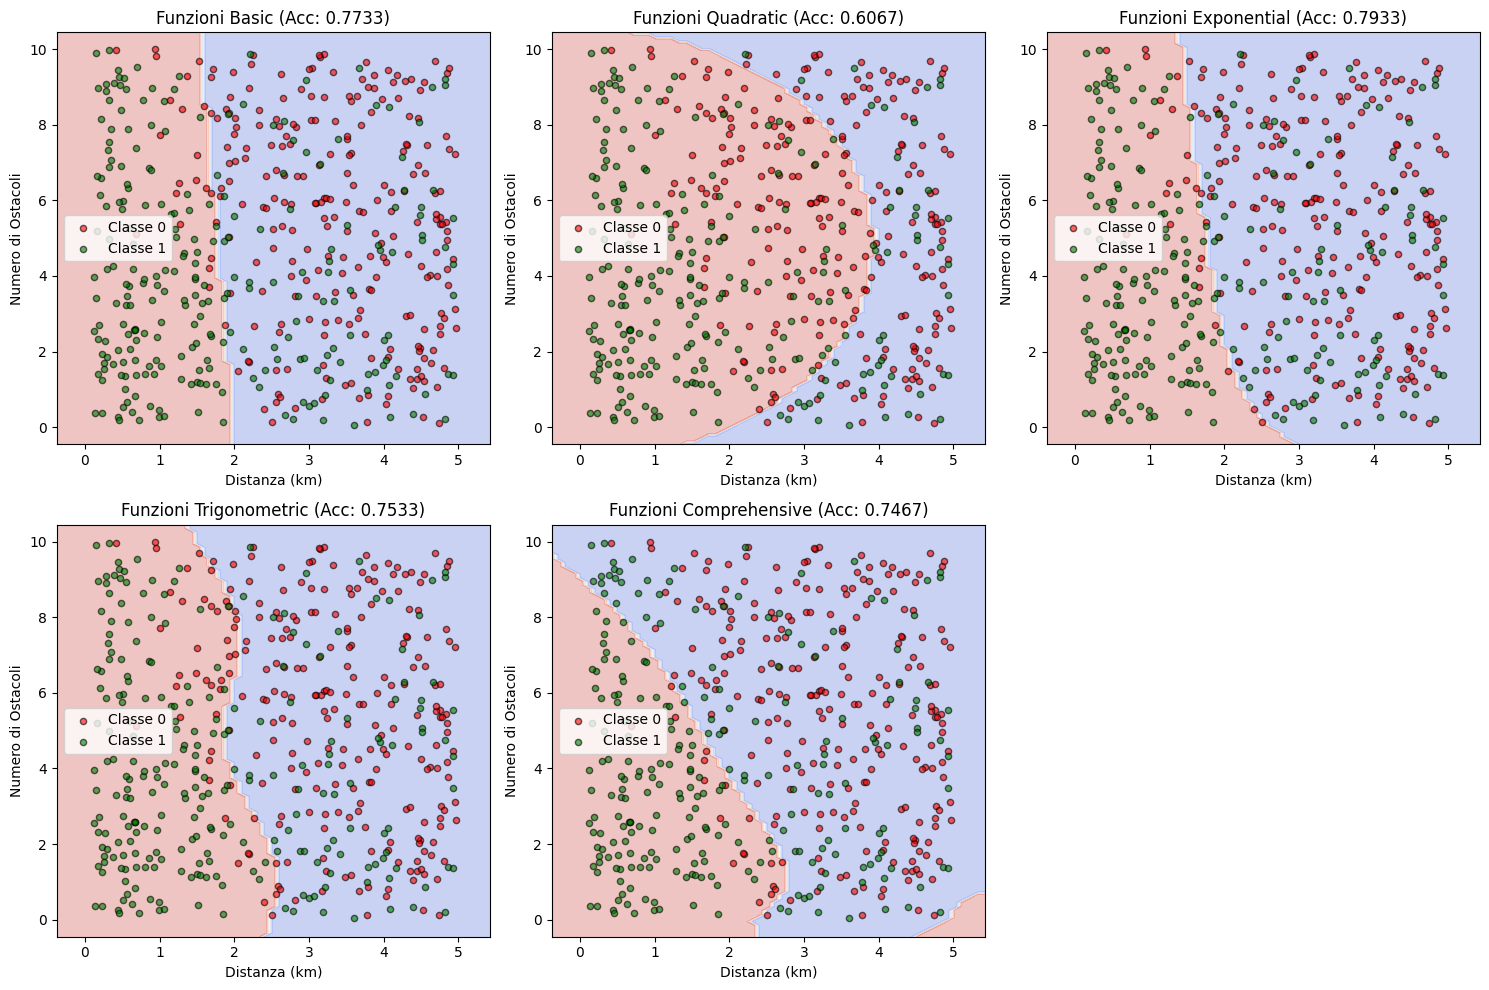

In [ ]:
def plot_all_decision_boundaries(models, X, y):
    # Definiamo i limiti del grafico
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Creiamo una griglia di punti
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Calcoliamo quante righe e colonne servono
    n_models = len(models)
    n_cols = min(3, n_models)
    n_rows = (n_models + n_cols - 1) // n_cols
    
    # Creiamo la figura
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_models > 1 else [axes]
    
    # Colori per le classi
    colors = ['red', 'green']
    
    for i, (basis_type, model) in enumerate(models.items()):
        ax = axes[i]
        
        # Prediciamo le classi
        Z = model.predict(grid_points)
        Z = Z.reshape(xx.shape)
        
        # Visualizziamo il confine di decisione
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        
        # Aggiungiamo i punti
        for c, color in zip([0, 1], colors):
            idx = np.where(y == c)
            ax.scatter(X[idx, 0], X[idx, 1], c=color, s=20, alpha=0.6, 
                      edgecolor='k', label=f"Classe {c}")
        
        ax.set_title(f'Funzioni {basis_type.capitalize()} (Acc: {accuracies[basis_type]:.4f})')
        ax.set_xlabel('Distanza (km)')
        ax.set_ylabel('Numero di Ostacoli')
        ax.legend()
    
    # Nascondiamo eventuali subplot vuoti
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualizziamo tutti i confini di decisione
plot_all_decision_boundaries(models, X, signal_class)

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Usiamo il modello 'exponential'
best_model = models['exponential']

# Prediciamo sul set di test
y_pred = best_model.predict(X_test)

# Calcoliamo la confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizziamo la confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Segnale Scarso', 'Segnale Buono'],
            yticklabels=['Segnale Scarso', 'Segnale Buono'])
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Reale')
plt.title('Confusion Matrix (Funzioni Base Esponenziali)')
plt.show()

NameError: name 'models' is not defined

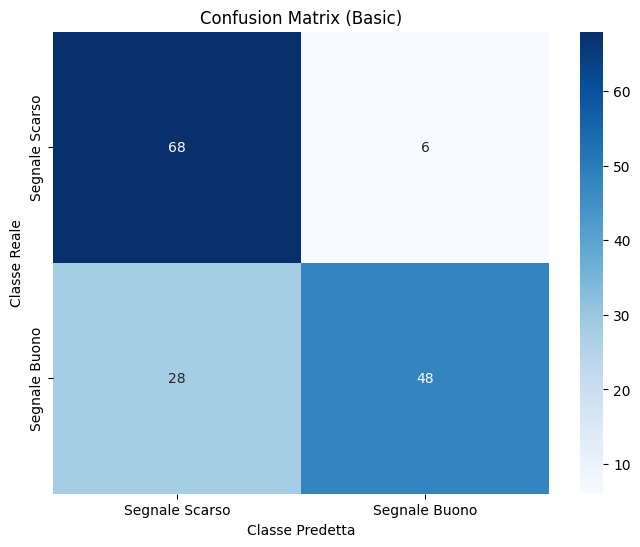

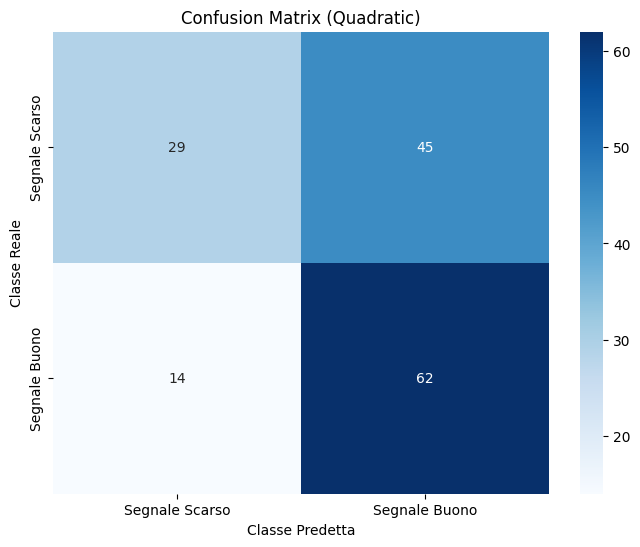

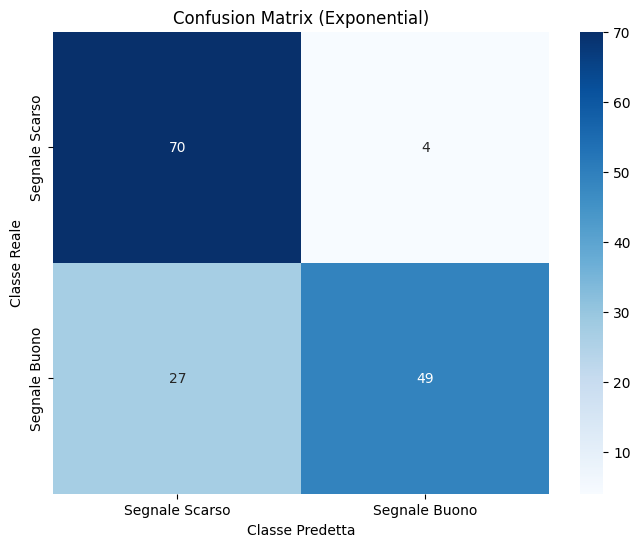

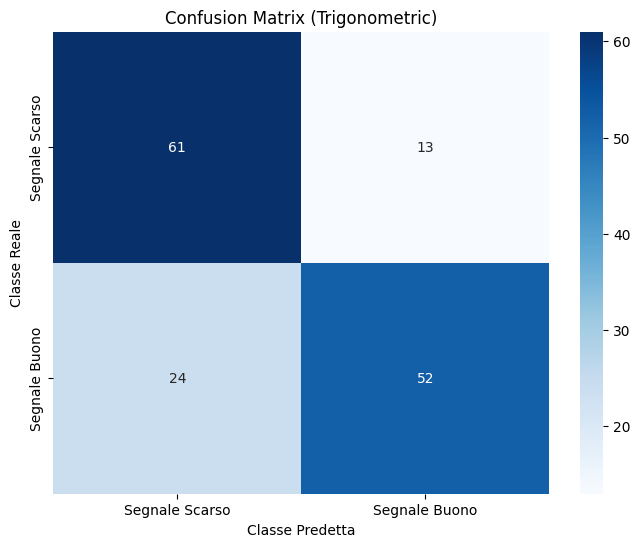

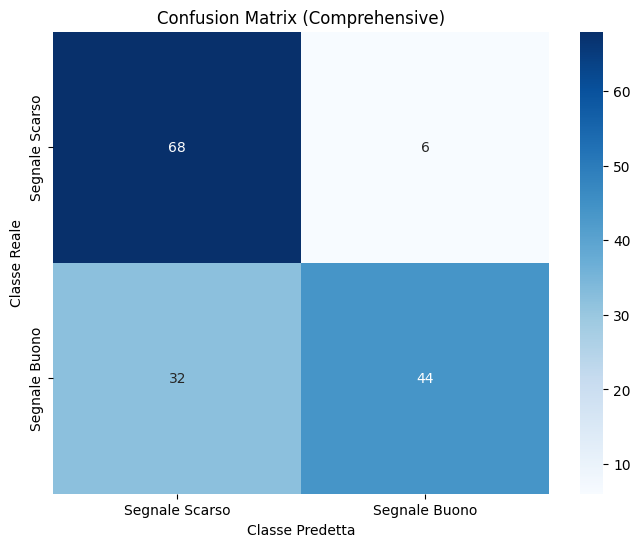

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Usiamo il modello 'exponential'
for best_model in models.values():
    # Prediciamo sul set di test
    y_pred = best_model.predict(X_test)

    # Calcoliamo la confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualizziamo la confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Segnale Scarso', 'Segnale Buono'],
                yticklabels=['Segnale Scarso', 'Segnale Buono'])
    plt.xlabel('Classe Predetta')
    plt.ylabel('Classe Reale')
    plt.title(f'Confusion Matrix ({best_model.basis_type.capitalize()})')
    plt.show()